In [1]:
from numpy import sin, cos, arccos, arcsin
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
import ffmpeg


In [2]:
class SinglePendulum:
    def __init__(self,
                init_state = [120,0],
                L = 2.0,
                M1 = 1.0,
                g = 9.81,
                b = 0.5,
                origin = (0,0)):
        self.init_state = np.asarray(init_state,dtype='float')
        self.params = (L,M1,g,b)
        self.origin = origin
        self.elapsed_time = 0 
        #Convert degrees to radians
        self.state = self.init_state * np.pi / 180.
        
        
    def position(self):
        (L, M1, g, b) = self.params
        
        x = np.cumsum([self.origin[0], L * sin(self.state[0])])
        y = np.cumsum([self.origin[1], -L * cos(self.state[0])])
        
        return (x,y)
    
    def energy(self):
        (L, M1, g,b) = self.params

        x = L * sin(self.state[0])
        y = -L * cos(self.state[0])
        
        vx = self.state[1] * y
        vy = -1 * self.state[1] * x
        
        v = [vx,vy]
        
        U = M1 * g * y
        K = 0.5 * M1 * np.dot(v,v)
        return U + K
    
    def equation(self, state, t):
        (L, M1, g, b) = self.params
        theta = state[0]
        omega = state[1]
        dydt = [omega, -b*omega -g/L * sin(theta)]
        return dydt
    
    def time_advance(self, dt):
        self.state = integrate.odeint(self.equation,self.state,[0, dt])[1]
        self.elapsed_time += dt


In [3]:
pendulum = SinglePendulum([-120,0])
dt = 1./30 # 30 fps
global l
l = pendulum.params[0]

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


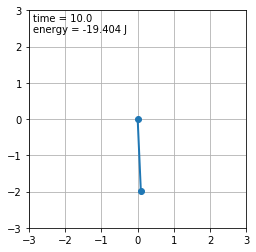

In [4]:
# The following code below was almost entirely cut and pasted from Jake VanderPlas's code 
# for his animation of a double pendulum of which this code owes heavily to. 


#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-1.5*l, 1.5*l), ylim=(-1.5*l, 1.5*l))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
energy_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)

def init():
    """initialize animation"""
    line.set_data([], [])
    time_text.set_text('')
    energy_text.set_text('')
    return line, time_text, energy_text

def animate(i):
    """perform animation step"""
    global pendulum, dt
    pendulum.time_advance(dt)
    
    line.set_data(*pendulum.position())
    time_text.set_text('time = %.1f' % pendulum.elapsed_time)
    energy_text.set_text('energy = %.3f J' % pendulum.energy())
    return line, time_text, energy_text

# choose the interval based on dt and the time to animate one step
from time import time
t0 = time()
animate(0)
t1 = time()
interval = 1000 * dt - (t1 - t0)

ani = animation.FuncAnimation(fig, animate, frames=300,
                              interval=interval, blit=True, init_func=init)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('double_pendulum.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

ani.save('single_pendulum_new.gif', fps=30, extra_args=['-vcodec', 'libx264'])


plt.show()